MNIST is the starting point of Computer Vision Research. Let’s try them with Keras. 

In here, We are going to setup linear-dummy-model for MNIST classification.

## Setups

what we need is tensorflow, keras mainly, and a bit of other libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Check if gpu is available here. Are we good?

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load Data, and EDA

Load data from keras, and check them.

Here, we are going to split the dataset into 3.

- Train: Textbook. our model works on this data again and again, in order to see the pattern.
- Validation: Mock Exam. Test paper is kept secret. However, we need to know if our model works good on unseen data. So we split training data, and assign validation dataset for that purpose.
- Test: Exam. This dataset should be kept secret. If not - we may unconsciously apply our knowledge on unseen data, which might result in failure of generalization.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [5]:
x_train.shape, y_train.shape

((54000, 28, 28), (54000,))

In [6]:
x_val.shape, y_val.shape

((6000, 28, 28), (6000,))

In [7]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

preprocess here. 
- For image data: divide by 255.0 so that the pixel values range from 0 to 1.
- For label data: make it to_categorical(may not be neccessary, but I'll do it.)

In [8]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [9]:
y_train, y_val, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_val), tf.keras.utils.to_categorical(y_test)

In [10]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

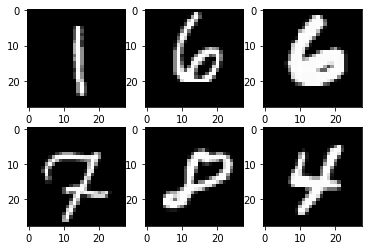

In [11]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap = "gray")
plt.show()

## Models

Let's set up some hyperparameters.

**BATCH_SIZE** will determine the number of data that will be into the model.

**EPOCHS** will be the number of iterations through the whole dataset.

In [12]:
BATCH_SIZE = 64
EPOCHS = 100

**Loss** function plays the role of penalty for the model.

If models does great on its job(classifying the digit well enough), penalty will go lower and lower.

Our function would be categorical crossentropy.

$ \Sigma_{i=1}^{C}t_ilog(s_i) $ 

Our objective is to minimize that loss.



In [13]:
loss = keras.losses.CategoricalCrossentropy()

**Metric** is the criteria for the model performance.

In [14]:
metrics = ["accuracy"]

**Optimizer** will decide how the model is being optimized. 

In [15]:
optimizer = keras.optimizers.SGD(learning_rate = 1e-03)

### Linear Model

Firstly, let's try linear models.

we may try something like:

$ pixel1 * a1 + ... + pixel784 * a784 + bias $

Our input is 28 X 28 image data.

So, we need to flatten that data into 1d array, in order to feed that as an input.

In [16]:
linear_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Additionally, callback functions will be listed. 

checkpoint callback will save the best model as a file.

In [18]:
ckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath="./best.ckpt",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [20]:
linear_model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

## Model Training

Let's train our model here!

In [22]:
with tf.device(device_name = device_name):
    linear_model_history = linear_model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, callbacks = [ckpt], shuffle = True, verbose = 2, validation_data=(x_val, y_val))

Epoch 1/100
844/844 - 2s - loss: 1.5725 - accuracy: 0.6494 - val_loss: 1.3902 - val_accuracy: 0.7243
Epoch 2/100
844/844 - 2s - loss: 1.2511 - accuracy: 0.7552 - val_loss: 1.1497 - val_accuracy: 0.7752
Epoch 3/100
844/844 - 2s - loss: 1.0616 - accuracy: 0.7939 - val_loss: 1.0000 - val_accuracy: 0.8027
Epoch 4/100
844/844 - 2s - loss: 0.9395 - accuracy: 0.8115 - val_loss: 0.8992 - val_accuracy: 0.8153
Epoch 5/100
844/844 - 2s - loss: 0.8547 - accuracy: 0.8233 - val_loss: 0.8269 - val_accuracy: 0.8242
Epoch 6/100
844/844 - 2s - loss: 0.7924 - accuracy: 0.8318 - val_loss: 0.7720 - val_accuracy: 0.8315
Epoch 7/100
844/844 - 2s - loss: 0.7445 - accuracy: 0.8381 - val_loss: 0.7293 - val_accuracy: 0.8390
Epoch 8/100
844/844 - 2s - loss: 0.7065 - accuracy: 0.8428 - val_loss: 0.6947 - val_accuracy: 0.8422
Epoch 9/100
844/844 - 2s - loss: 0.6755 - accuracy: 0.8467 - val_loss: 0.6661 - val_accuracy: 0.8460
Epoch 10/100
844/844 - 2s - loss: 0.6496 - accuracy: 0.8503 - val_loss: 0.6421 - val_accura

Let's plot the training history.

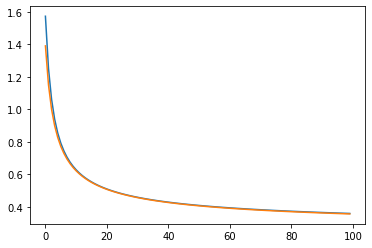

In [23]:
plt.plot(linear_model_history.history["loss"])
plt.plot(linear_model_history.history["val_loss"])
plt.show()

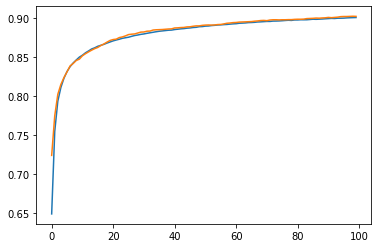

In [24]:
plt.plot(linear_model_history.history["accuracy"])
plt.plot(linear_model_history.history["val_accuracy"])
plt.show()

## Model Evaluation

Training has completed. Does that work well enough?

Still, we need to figure if it works great on unseen data, or our test data namely.

In [25]:
with tf.device(device_name = device_name):
    linear_model.evaluate(x_test, y_test, batch_size = BATCH_SIZE, verbose = 2)

157/157 - 0s - loss: 0.3422 - accuracy: 0.9078


In [26]:
test_image = tf.expand_dims(x_test[0], axis = 0)

In [27]:
linear_model_output = linear_model(test_image)
linear_model_output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.86948455e-04, 1.31454783e-06, 1.77699287e-04, 1.66509475e-03,
        5.28979544e-05, 1.20253404e-04, 2.46728905e-06, 9.94328558e-01,
        2.80812616e-04, 3.18387127e-03]], dtype=float32)>

In [28]:
softmax_output = tf.nn.softmax(linear_model_output)
softmax_output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08542337, 0.08540752, 0.08542258, 0.08554973, 0.08541192,
        0.08541767, 0.08540761, 0.23084843, 0.08543139, 0.08567976]],
      dtype=float32)>

In [29]:
tf.math.argmax(softmax_output, axis = 1) 

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

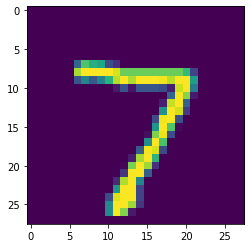

In [30]:
plt.imshow(x_test[0])

It seems to work quite well! 

Next, let's try to enhance the model performance using various tricks.